# required packages

In [2]:
library(readr)
library(tidyr)
library(dplyr)
library(tidyverse)
library(lubridate)
library(ggplot2)

# data upload

In [3]:
github="https://raw.githubusercontent.com/agronomy4future/raw_data_practice/main/day_length_data.csv"
dataA= data.frame(read_csv(url(github), show_col_types=FALSE))
head (dataA, 10)

,Day,Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec
,<dbl>,<time>,<time>,<time>,<time>,<time>,<time>,<time>,<time>,<time>,<time>,<time>,<time>
1,1,09:23:00,10:10:00,11:18:00,12:40:00,13:55:00,14:50:00,14:59:00,14:16:00,13:04:00,11:46:00,10:28:00,09:32:00
2,2,09:24:00,10:12:00,11:21:00,12:43:00,13:57:00,14:51:00,14:58:00,14:14:00,13:02:00,11:44:00,10:26:00,09:31:00
3,3,09:24:00,10:14:00,11:23:00,12:45:00,13:59:00,14:52:00,14:57:00,14:12:00,12:59:00,11:41:00,10:24:00,09:30:00
4,4,09:25:00,10:16:00,11:26:00,12:48:00,14:01:00,14:53:00,14:57:00,14:10:00,12:57:00,11:39:00,10:22:00,09:29:00
5,5,09:26:00,10:19:00,11:28:00,12:50:00,14:04:00,14:54:00,14:56:00,14:08:00,12:54:00,11:36:00,10:19:00,09:28:00
6,6,09:27:00,10:21:00,11:31:00,12:53:00,14:06:00,14:55:00,14:55:00,14:06:00,12:52:00,11:33:00,10:17:00,09:27:00
7,7,09:28:00,10:23:00,11:34:00,12:56:00,14:08:00,14:56:00,14:54:00,14:04:00,12:49:00,11:31:00,10:15:00,09:26:00
8,8,09:29:00,10:26:00,11:36:00,12:58:00,14:10:00,14:57:00,14:53:00,14:02:00,12:46:00,11:28:00,10:13:00,09:25:00
9,9,09:30:00,10:28:00,11:39:00,13:01:00,14:12:00,14:57:00,14:52:00,13:59:00,12:44:00,11:26:00,10:11:00,09:24:00


# transpose column to row

In [4]:
dataB= data.frame(dataA %>%
                  pivot_longer(
                  cols= c(Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec),
                  names_to="month",
                  values_to="day_length"))

head (dataB, 10)

,Day,month,day_length
,<dbl>,<chr>,<time>
1,1,Jan,09:23:00
2,1,Feb,10:10:00
3,1,Mar,11:18:00
4,1,Apr,12:40:00
5,1,May,13:55:00
6,1,June,14:50:00
7,1,July,14:59:00
8,1,Aug,14:16:00
9,1,Sep,13:04:00


# add numbers corresponding to each month

In [5]:
dataB$month1= ifelse(dataB$month=="Jan", 1,
               ifelse(dataB$month=="Feb", 2,
                ifelse(dataB$month=="Mar", 3,
                 ifelse(dataB$month=="Apr", 4,
                  ifelse(dataB$month=="May", 5,
                   ifelse(dataB$month=="June", 6,
                    ifelse(dataB$month=="July", 7,
                     ifelse(dataB$month=="Aug", 8,
                      ifelse(dataB$month=="Sep", 9,
                       ifelse(dataB$month=="Oct", 10,
                        ifelse(dataB$month=="Nov", 11,
                          ifelse(dataB$month=="Dec", 12, NA))))))))))))

head (dataB, 10)

,Day,month,day_length,month1
,<dbl>,<chr>,<time>,<dbl>
1,1,Jan,09:23:00,1
2,1,Feb,10:10:00,2
3,1,Mar,11:18:00,3
4,1,Apr,12:40:00,4
5,1,May,13:55:00,5
6,1,June,14:50:00,6
7,1,July,14:59:00,7
8,1,Aug,14:16:00,8
9,1,Sep,13:04:00,9


# delete missing values

In [6]:
dataB= dataB[complete.cases(dataB$day_length),]

# sort data by month and day

In [7]:
dataB_sorted= dataB %>%
              arrange(month1, Day)
head (dataB_sorted, 10)

,Day,month,day_length,month1
,<dbl>,<chr>,<time>,<dbl>
1,1,Jan,09:23:00,1
2,2,Jan,09:24:00,1
3,3,Jan,09:24:00,1
4,4,Jan,09:25:00,1
5,5,Jan,09:26:00,1
6,6,Jan,09:27:00,1
7,7,Jan,09:28:00,1
8,8,Jan,09:29:00,1
9,9,Jan,09:30:00,1


# add numbers

In [8]:
dataB_sorted= dataB_sorted %>%
              mutate(Sequence= 1:n())
head(dataB_sorted, 10)

,Day,month,day_length,month1,Sequence
,<dbl>,<chr>,<time>,<dbl>,<int>
1,1,Jan,09:23:00,1,1
2,2,Jan,09:24:00,1,2
3,3,Jan,09:24:00,1,3
4,4,Jan,09:25:00,1,4
5,5,Jan,09:26:00,1,5
6,6,Jan,09:27:00,1,6
7,7,Jan,09:28:00,1,7
8,8,Jan,09:29:00,1,8
9,9,Jan,09:30:00,1,9


# create a line graph

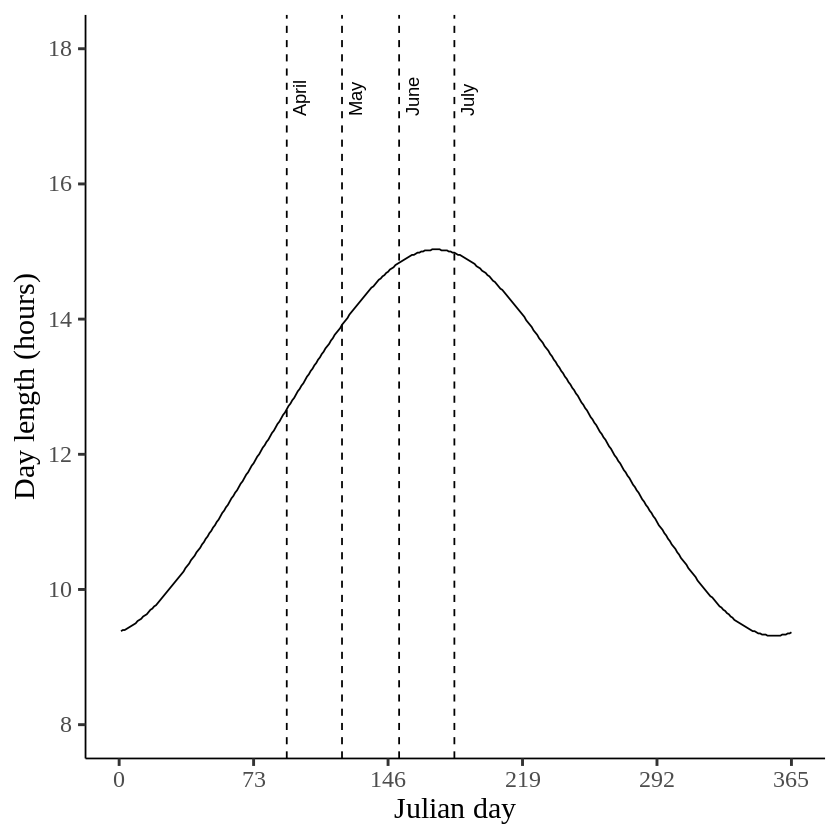

In [9]:
dataB_sorted |>
  dplyr::mutate(light=hour(day_length)+minute(day_length)/60) |>
  ggplot(aes(x=Sequence, y=light)) +
  geom_line () +
  scale_y_continuous(breaks=seq(8,18,2), limits= c(8,18)) +
  scale_x_continuous(breaks=seq(0,365,73), limits= c(0,365)) +

  geom_vline(xintercept=91, linetype="dashed", color="black") +
  annotate("text", label=paste("April"),
           x=91, y=17, angle=90, hjust=0, vjust=1.5)+

  geom_vline(xintercept=121, linetype="dashed", color="black") +
  annotate("text", label=paste("May"),
           x=121, y=17, angle=90, hjust=0, vjust=1.5)+

  geom_vline(xintercept=152, linetype="dashed", color="black") +
  annotate("text", label=paste("June"),
           x=152, y=17, angle=90, hjust=0, vjust=1.5)+

  geom_vline(xintercept=182, linetype="dashed", color="black") +
  annotate("text", label=paste("July"),
           x=182, y=17, angle=90, hjust=0, vjust=1.5)+

  labs(x="Julian day", y="Day length (hours)") +
  theme_classic(base_size=18, base_family="serif")+
  theme(axis.line=element_line(linewidth=0.5, colour="black"))

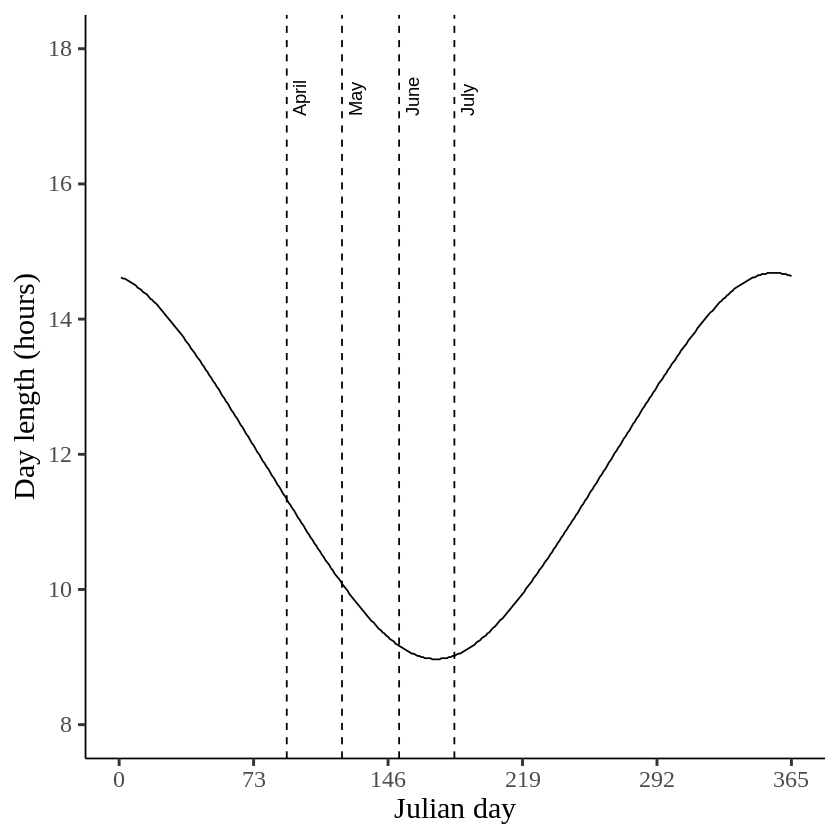

In [10]:
dataB_sorted |>
  dplyr::mutate(light=hour(day_length)+minute(day_length)/60) |>
  dplyr::mutate(night=24-light) |>
  ggplot(aes(x=Sequence, y=night)) +
  geom_line () +
  scale_y_continuous(breaks=seq(8,18,2), limits = c(8,18)) +
  scale_x_continuous(breaks=seq(0,365,73), limits = c(0,365)) +

  geom_vline(xintercept=91, linetype="dashed", color="black") +
  annotate("text", label=paste("April"),
           x=91, y=17, angle=90, hjust=0, vjust=1.5)+

  geom_vline(xintercept=121, linetype="dashed", color="black") +
  annotate("text", label=paste("May"),
           x=121, y=17, angle=90, hjust=0, vjust=1.5)+

  geom_vline(xintercept=152, linetype="dashed", color="black") +
  annotate("text", label=paste("June"),
           x=152, y=17, angle=90, hjust=0, vjust=1.5)+

  geom_vline(xintercept=182, linetype="dashed", color="black") +
  annotate("text", label=paste("July"),
           x=182, y=17, angle=90, hjust=0, vjust=1.5)+

  labs(x="Julian day", y="Day length (hours)") +
  theme_classic(base_size=18, base_family="serif")+
  theme(axis.line=element_line(linewidth=0.5, colour="black"))


# full code

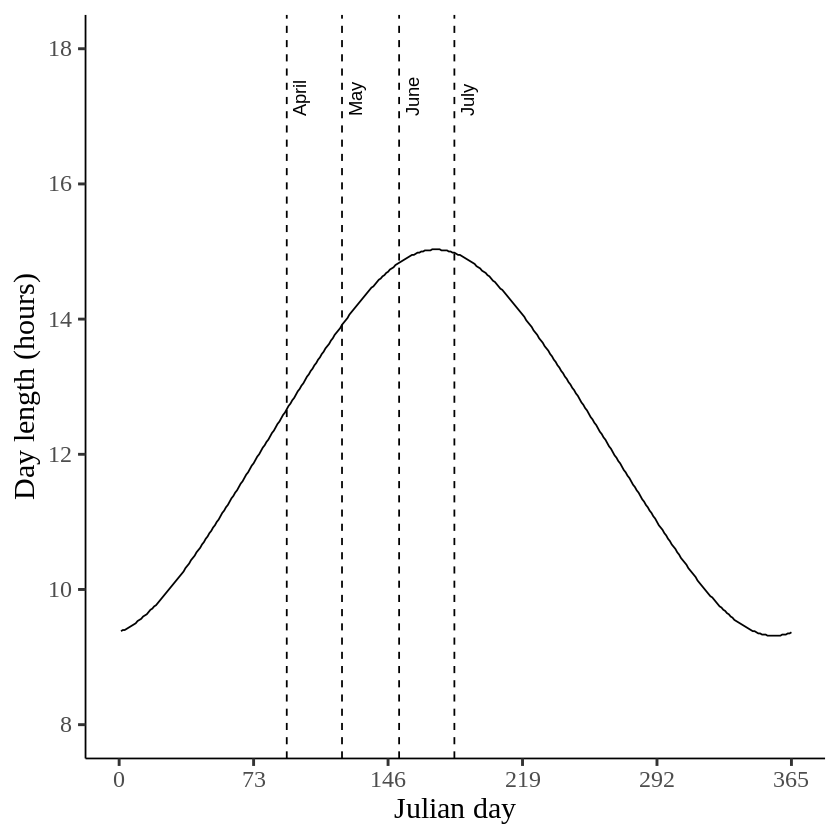

In [12]:
library(readr)
library(tidyr)
library(dplyr)
library(tidyverse)
library(lubridate)
library(ggplot2)

github="https://raw.githubusercontent.com/agronomy4future/raw_data_practice/main/day_length_data.csv"
dataA= data.frame(read_csv(url(github), show_col_types=FALSE))

dataB= data.frame(dataA %>%
                  pivot_longer(
                  cols= c(Jan,Feb,Mar,Apr,May,June,July,Aug,Sep,Oct,Nov,Dec),
                  names_to="month",
                  values_to="day_length"))

dataB$month1= ifelse(dataB$month=="Jan", 1,
               ifelse(dataB$month=="Feb", 2,
                ifelse(dataB$month=="Mar", 3,
                 ifelse(dataB$month=="Apr", 4,
                  ifelse(dataB$month=="May", 5,
                   ifelse(dataB$month=="June", 6,
                    ifelse(dataB$month=="July", 7,
                     ifelse(dataB$month=="Aug", 8,
                      ifelse(dataB$month=="Sep", 9,
                       ifelse(dataB$month=="Oct", 10,
                        ifelse(dataB$month=="Nov", 11,
                          ifelse(dataB$month=="Dec", 12, NA))))))))))))

dataB= dataB[complete.cases(dataB$day_length),]

dataB_sorted= dataB %>%
              arrange(month1, Day)

dataB_sorted= dataB_sorted %>%
              mutate(Sequence= 1:n())

dataB_sorted |>
  dplyr::mutate(light=hour(day_length)+minute(day_length)/60) |>
  ggplot(aes(x=Sequence, y=light)) +
  geom_line () +
  scale_y_continuous(breaks=seq(8,18,2), limits= c(8,18)) +
  scale_x_continuous(breaks=seq(0,365,73), limits= c(0,365)) +

  geom_vline(xintercept=91, linetype="dashed", color="black") +
  annotate("text", label=paste("April"),
           x=91, y=17, angle=90, hjust=0, vjust=1.5)+

  geom_vline(xintercept=121, linetype="dashed", color="black") +
  annotate("text", label=paste("May"),
           x=121, y=17, angle=90, hjust=0, vjust=1.5)+

  geom_vline(xintercept=152, linetype="dashed", color="black") +
  annotate("text", label=paste("June"),
           x=152, y=17, angle=90, hjust=0, vjust=1.5)+

  geom_vline(xintercept=182, linetype="dashed", color="black") +
  annotate("text", label=paste("July"),
           x=182, y=17, angle=90, hjust=0, vjust=1.5)+

  labs(x="Julian day", y="Day length (hours)") +
  theme_classic(base_size=18, base_family="serif")+
  theme(axis.line=element_line(linewidth=0.5, colour="black"))